In [362]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [363]:
rbc_l=4.5
rbc_h=6.3
hb_l=13.2
hb_h=16.6
wbc_l=3.4
wbc_h=9.6
leuk_l=62
leuk_h=74
lym_l=33
lym_h=45
plt_l=150
plt_h=450
crea_l=0.7
crea_h=1.3
gluc_l=65
gluc_h=110
na_l=135
na_h=145
k_l=3.5
k_h=5.0
ca_l=1.03
ca_h=1.23
tsh_l=1.3
tsh_h=4.0
t3_l=0.2
t3_h=0.5
t4_l=0.7
t4_h=1.4


In [364]:
dic={
    'rbc':[rbc_l,rbc_h],
    'hb':[hb_l,hb_h],
    'wbc':[wbc_l,wbc_h],
    'plt':[plt_l,plt_h],
    'crea':[crea_l,crea_h],
    'gluc':[gluc_l,gluc_h],
    'na':[na_l,na_h],
    'k':[k_l,k_h],
    'ca':[ca_l,ca_h],
    'tsh':[tsh_l,tsh_h],
    't4':[t4_l,t4_h],
    't3':[t3_l,t3_h],
  
}

In [365]:
reldic={
    
    'leuk':['wbc',leuk_l,leuk_h],
    'lym':['wbc',lym_l,lym_h]
}

In [366]:
num_months=21*12
pat=pd.DataFrame()
pat['month']=np.arange(0,num_months)
pat['id']='pat_0'

Base labs

In [367]:
for lab in dic.keys():
    low=dic[lab][0]
    high=dic[lab][1]
    mean= np.random.uniform(low,high)
    std=(high-low)/4
    results=np.random.normal(mean, std, size=num_months)
    pat[lab]=results

Relative labs

In [368]:
for lab in reldic:
    low=reldic[lab][1]
    high=reldic[lab][2]
    mean= np.random.uniform(low,high)
    std=(high-low)/4

    percents= np.random.normal(mean,std,num_months)
    results=percents*pat[reldic[lab][0]]/100
    pat[lab]=results

disease

In [389]:
sick_probs=[0.1,0.3,0.6]
sick=np.random.choice(np.arange(0, 3), p=sick_probs)
sick_mult=[0.5,1,2]
sick_start=[int(num_months*0.75),int(num_months*0.5),int(num_months*0.25)]
viral_probs=[10/num_months, 30/num_months, 50/num_months]

sick_p=viral_probs[sick]
pat['sick']=np.random.choice(2,size=num_months, p=[1-sick_p,sick_p])


In [371]:
diseases={
'diabetes':0.3,
'crf':0.2,
'anemia':0.3,
'thyroid':0.2
}

In [372]:
for disease in diseases.keys():
    p=diseases[disease]*sick_mult[sick]
    if p>=1:
        p=1
    booli=np.random.choice(np.arange(0, 2),p=[1-p,p] )
    if booli ==0 :
        pat[disease]=0
    if booli==1:
        start=random.randint(sick_start[sick], num_months)
        pat[disease]=0
        pat.loc[pat.month >= start, disease] = 1


sick

In [373]:
mask = (pat.sick == 1)
sick_len=pat[pat.sick==1].shape[0]

pat.loc[mask,'wbc'] = random_change(pat.loc[mask,'wbc'], 2.5,0.5, sick_len)
pat.loc[mask,'leuk'] = random_change(pat.loc[mask,'leuk'], 2.5,0.5, sick_len)
pat.loc[mask,'plt'] = random_change(pat.loc[mask,'plt'], 1.2,0.2, sick_len)
pat.loc[mask,'gluc'] = random_change(pat.loc[mask,'gluc'], 1.5,0.3, sick_len)



CRF

In [374]:
def random_change(vector, mean, std,length):
    mul=np.random.normal(mean, std, size=length)
    return vector * mul

def gradual_change(vector, mean, std,length):
    inc=np.random.normal(mean,std, size=length)
    inc=np.sort(inc)
    return vector + inc

In [375]:
mask = (pat.crf == 1)
crf_len=pat[pat.crf==1].shape[0]

pat.loc[mask,'crea'] = gradual_change(pat.loc[mask,'crea'], 0.15,0.05, crf_len)
pat.loc[mask,'k'] = gradual_change(pat.loc[mask,'k'], 0.1,0.03, crf_len)
pat.loc[mask,'hb'] = random_change(pat.loc[mask,'hb'], 0.9,0.04, crf_len)
pat.loc[mask,'rbc'] = random_change(pat.loc[mask,'rbc'], 0.9,0.04, crf_len)


In [376]:
pat.columns

Index(['month', 'id', 'rbc', 'hb', 'wbc', 'plt', 'crea', 'gluc', 'na', 'k',
       'ca', 'tsh', 't4', 't3', 'leuk', 'lym', 'sick', 'diabetes', 'crf',
       'anemia', 'thyroid'],
      dtype='object')

diabetes

In [377]:
mask = (pat.diabetes == 1)
diabetes_len=pat[pat.diabetes==1].shape[0]

pat.loc[mask,'gluc'] = gradual_change(pat.loc[mask,'gluc'], 7,0.5, diabetes_len)
pat.loc[mask,'crea'] = gradual_change(pat.loc[mask,'crea'], 0.1,0.03, diabetes_len)


anemia

In [378]:
mask = (pat.anemia == 1)
anemia_len=pat[pat.anemia==1].shape[0]

pat.loc[mask,'hb'] = gradual_change(pat.loc[mask,'hb'], -0.5,0.03, anemia_len)
pat.loc[mask,'rbc'] = gradual_change(pat.loc[mask,'rbc'], -0.25,0.015, anemia_len)


thyroid

In [379]:
mask = (pat.thyroid == 1)
thyroid_len=pat[pat.thyroid==1].shape[0]

pat.loc[mask,'tsh'] = gradual_change(pat.loc[mask,'tsh'], 0.2,0.05, thyroid_len)
pat.loc[mask,'t4'] = gradual_change(pat.loc[mask,'t4'], -0.1,0.05, thyroid_len)
pat.loc[mask,'t3'] = gradual_change(pat.loc[mask,'t3'], -0.05,0.025, thyroid_len)


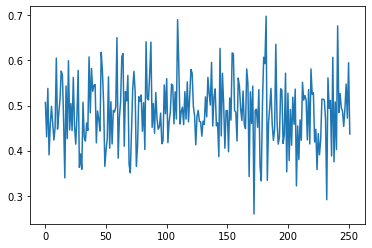

In [380]:
plt.plot(pat.month, pat.t3)

add NAs


In [381]:
pat['total']=pat.sick+pat.diabetes+pat.crf+pat.anemia+pat.thyroid

In [382]:
pat

,month,id,rbc,hb,wbc,plt,crea,gluc,na,k,...,t4,t3,leuk,lym,sick,diabetes,crf,anemia,thyroid,total
0,0,pat_0,4.627081,16.095676,6.922350,127.903036,0.898998,68.711608,142.738476,3.753705,...,1.196708,0.506693,4.303565,2.921687,0,0,0,0,0,0
1,1,pat_0,4.553733,13.887878,7.311732,321.566692,1.006555,85.436375,141.352718,3.490287,...,1.026908,0.430508,4.784449,3.240388,0,0,0,0,0,0
2,2,pat_0,4.559232,13.577722,3.553391,256.782165,0.915341,78.156393,143.964771,3.287744,...,1.431709,0.537914,2.469780,1.546225,0,0,0,0,0,0
3,3,pat_0,5.236523,13.296026,8.615844,301.960740,0.967090,98.717514,142.419809,3.241262,...,1.296231,0.390534,5.450131,3.437431,0,0,0,0,0,0
4,4,pat_0,4.395320,14.063393,11.567941,192.900673,1.138112,154.416200,148.966954,3.369068,...,1.276083,0.457653,11.736522,2.946191,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,247,pat_0,5.043042,16.124315,16.755655,232.645491,0.808507,160.342347,142.693252,3.660274,...,1.347833,0.493031,10.139634,3.109773,1,0,0,0,0,1
248,248,pat_0,4.676070,14.174780,9.164245,290.996816,0.960579,74.744190,145.930285,3.711652,...,1.073321,0.547550,5.924227,4.013839,0,0,0,0,0,0
249,249,pat_0,4.604176,14.931027,6.361325,177.773504,0.988120,89.761131,144.124954,3.593701,...,0.958155,0.472033,4.123457,3.137612,0,0,0,0,0,0
250,250,pat_0,3.948536,14.812281,6.743520,261.939952,1.366496,78.523530,144.674554,3.411098,...,1.239095,0.594923,4.006823,2.626922,0,0,0,1,0,1


In [384]:
mask_0 = (pat.sick == 0)
mask_1 = ((pat.sick >0)&(pat.sick<3))
mask_2 = (pat.sick >=3)

drop0_len=pat[mask_0].shape[0]
drop1_len=pat[mask_1].shape[0]
drop2_len=pat[mask_2].shape[0]


In [385]:
p_drop0=0.7
p_drop1=0.6
p_drop2=0.4

for lab in ['hb','crea','tsh']:
    
    if lab=='hb':
        delta=0
    elif lab=='crea':
        delta=0.1
    elif lab=='tsh':
        delta=0.2
        
    p_drop0=p_drop0+delta
    p_drop1=p_drop1+delta
    p_drop2=p_drop2+delta
    
    
    drop0=np.random.choice(2,size=drop0_len, p=[p_drop0,1-p_drop0])
    drop1=np.random.choice(2,size=drop1_len, p=[p_drop1,1-p_drop1])
    drop2=np.random.choice(2,size=drop2_len, p=[p_drop2,1-p_drop2])
    
    pat.loc[mask_0,lab]=pat.loc[mask_0,lab]*drop0
    pat.loc[mask_1,lab]=pat.loc[mask_1,lab]*drop1
    pat.loc[mask_2,lab]=pat.loc[mask_2,lab]*drop2

    pat[lab].replace(0, np.nan, inplace=True)

In [386]:
hb_cols=['rbc', 'wbc', 'plt','leuk', 'lym']
crea_cols=['gluc', 'na', 'k','ca']
tsh_cols=['t4','t3']

In [387]:
for col in hb_cols:
    mask_cbc = (pat.hb.isna())
    pat.loc[mask_cbc,col]=pat.loc[mask_cbc,'hb']
    
for col in crea_cols:
    mask = (pat.crea.isna())
    pat.loc[mask,col]=pat.loc[mask,'crea']
    
for col in tsh_cols:
    mask = (pat.tsh.isna())
    pat.loc[mask,col]=pat.loc[mask,'tsh']

In [388]:
pat

,month,id,rbc,hb,wbc,plt,crea,gluc,na,k,...,t4,t3,leuk,lym,sick,diabetes,crf,anemia,thyroid,total
0,0,pat_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1,1,pat_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
2,2,pat_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
3,3,pat_0,5.236523,13.296026,8.615844,301.960740,NaN,NaN,NaN,NaN,...,NaN,NaN,5.450131,3.437431,0,0,0,0,0,0
4,4,pat_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,247,pat_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0,0,0,0,1
248,248,pat_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
249,249,pat_0,NaN,NaN,NaN,NaN,0.988120,89.761131,144.124954,3.593701,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
250,250,pat_0,NaN,NaN,NaN,NaN,1.366496,78.523530,144.674554,3.411098,...,NaN,NaN,NaN,NaN,0,0,0,1,0,1
